### Introduction to Ames Housing Price Analysis

The analysis for this project will be on the Ames housing price dataset, and the basic premise for this is to find out what are the important factors in determining a house's value in the market, as well as predicting how these predictors will fare against real-life test data. This analysis can then help a buyer/seller in determining what they should look out for when purchasing a property in Ames.

The Ames dataset contains a wide range of feature related to each housing sale within Ames, a city in Iowa. You can find the full list of features in the list below.

The various neighbourhoods that are contained within our dataset are scattered around Ames, here's a quick generalised look of where these places are on a map, and a breakdown of the sale price by these neighbourhoods:

<img src="./img/map.png">

<img src="./img/saleprice.png">

We can already see that there's some form of correlation between the living space area and overall quality as well.

Next, let's take a look at what each feature represents in our dataset 

In [1]:
%%html
<style>
table {float:left}
</style>

|Feature|Type|Description|
|---|---|---|
|PID|int|Parcel ID number (can be used with city website for parcel checking| 
|MS SubClass|int|ID of type of dwelling in sale| 
|MS Zoning|nominal|ID of zoning classificiton of sale|
|Lot Frontage|float|Linear feat of street connected to property|
|Lot Area|int|Lot size in square feet|
|Street|nominal|Type of road access to property|
|Alley|nominal|Type of alley access to property|
|Lot shape|ordinal|General shape of property|
|Land Contour|nominal|Flatness of the property|
|Utilities|ordinal|Type of utilities available|
|Lot Config|nominal|Lot configuration|
|Land Slope|ordinal|Slope of property|
|Neighborhood|nominal|Physical locations within Ames city limits (map available below)|
|Condition 1|nominal|Proximity to various conditions|
|Condition 2|nominal|Proximity to various conditions|
|Bldg Type|nominal|Type of dwelling|
|House style|nominal|Style of dwelling|
|Overall Qual|int|Rates the overall material and finish of the house (1-10, with 1 being the worst|
|Overall Cond|int|Rates the overall condition of the house (1-10, with 1 being the worst|
|Year Built|int|Original construction date|
|Year Remod/Add|int|Remodel date (same as construction date if none)|
|Roof Style|nominal|Type of roof|
|Roof Matl|nominal|Roof material|
|Exterior 1|nominal|Exterior covering on house|
|Exterior 2|nominal|Exterior covering on house (if more than one material|
|Mas Vnr Type|nominal|Masonry veneer type|
|Mas Vnr Area|float|Masonry veneer area in square feet|
|Exter Qual|ordinal|Evaluates the quality of the material on the exterior|
|Exter Cond|ordinal|Evaluates the current condition of the material on the exterior|
|Foundation|nominal|Type of foundation|
|Bsmt Qual|ordinal|Evaluates the height of the basement|
|Bsmt Cond|ordinal|Evalutes the general condition of the basement|
|Bsmt Exposure|ordinal|Refers to walkout or garden level walls|
|BsmtFin Type 1|ordinal|Rating of basement finished area|
|BsmtFin SF 1|float|Type 1 finished square feet|
|BsmtFinType 1|ordinal|Rating of basement finished area (if multiple types)|
|BsmtFin SF 2|float|Type 2 finished square feet|
|Bsmt Unf SF|float|Unfinished square feet of basement area|
|Total Bsmt SF|float|Total square feet of basement area|
|Heating|nominal|Type of heating|
|HeatingQC|ordinal|Heating quality and condition|
|Central Air|nominal|Central air conditioning|
|Electrical|object|Electrical system|
|1st Flr SF|int|First floor square feet|
|2nd Flr SF|int|Second floor square feet|
|Low Qual Fin SF|int|Low quality finished square feet (all floors)|
|Gr Liv Area|int|Above grade (ground) living area square feet|
|Bsmt Full Bath|float|Basement full bathrooms|
|Bsmt Half Bath|float|Basement half bathrooms|
|Full Bath|int|Full bathrooms above grade|
|Half Bath|int|Half baths above grade|
|Bedroom|int|Bedrooms above grade (doesn't include basement bedrooms|
|Kitchen|int|Kitchens above grade|
|KitchenQual|ordianl|Kitchen quality|
|TotRmsAbvGrd|int|Total rooms above grade (doesn't include bathrooms)|
|Functional|ordinal|Home functionality (typical until deductions given)|
|Fireplace|int|Number of fireplaces|
|FireplaceQu|ordinal|Fireplace quality|
|Garage Type|nominal|Garage location|
|Garage Yr Blt|int|Year garage was built|
|Garage Finish|ordinal|Interior finish of the garage|
|Garage Cars|float|Size of garage in car capacity|
|Garage Area|float|Size of garage in square feet|
|Garage Qual|ordinal|Garage quality|
|Garage Cond|ordinal|Garage condition|
|Paved Drive|ordinal|Paved driveway type|
|Wood Deck SF|float|Wood deck area in square feet|
|Open Porch SF|float|Open porch area in square feet|
|Enclosed porch|float|Enclosed porch area in square feet|
|3-Ssn Porch|float|Three season porch area in square feet|
|Screen Porch|float|Screen porch area in square feet|
|Pool Area|float|Pool area in square feet|
|Pool QC|ordinal|Pool quality|
|Fence|ordinal|Fence quality|
|Misc Feature|nominal|Misc feature not covered in other categories|
|Misc Val|int|$Value of misc feature|
|Mo Sold|int|Month sold (MM)|
|Yr Sold|int|Year sold (YYYY)|
|Sale Type|nominal|Type of sale|
|Sale Price|float|$$ Sale price

In [2]:
# Importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle
from math import sqrt
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
%matplotlib inline

In [3]:
train = pd.read_csv('./datasets/train.csv') # Loading training data and shuffling it to prevent any order from affecting it.
train = shuffle(train, random_state=34)
test = pd.read_csv('./datasets/test.csv')

In [4]:
train.shape

(2051, 81)

In [5]:
test.shape

(879, 80)

In [6]:
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
490,361,527164060,60,RL,NaN,9636,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1992,1993,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,808.0,808.0,GasA,Gd,Y,SBrkr,808,785,0,1593,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,1993.0,RFn,2.0,389.0,TA,TA,Y,342,40,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,178000
486,1318,902328040,75,RM,35.0,6300,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,6,6,1914,2001,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,742.0,742.0,GasA,Ex,Y,SBrkr,742,742,0,1484,0.0,0.0,2,0,3,1,TA,9,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,291,134,0,0,0,NaN,NaN,NaN,0,6,2008,WD,128000
1214,823,906378110,20,RL,71.0,9178,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1468.0,1468.0,GasA,Ex,Y,SBrkr,1468,0,0,1468,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2008.0,RFn,3.0,904.0,TA,TA,Y,192,142,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,239900
936,2129,907187040,60,RL,47.0,10820,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,342.0,Unf,0.0,646.0,988.0,GasA,Ex,Y,SBrkr,988,885,0,1873,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,597.0,TA,TA,Y,202,123,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,235500
1531,1938,535325320,50,RL,55.0,7150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,4,4,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Rec,150.0,Unf,0.0,1040.0,1190.0,GasA,Gd,Y,SBrkr,1040,500,0,1540,1.0,0.0,1,0,4,1,Fa,7,Typ,0,NaN,Detchd,2002.0,Unf,1.0,352.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,115000


In [7]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


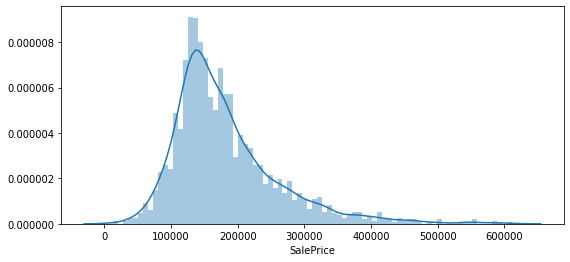

In [8]:
"""
Checking distribution for target, looks to me like a positive skew on the distro. 

This should be adjusted to resemble a more normal distribution as regressions are based on parametric distributions.
"""

plt.figure(figsize=(9,4))
sns.distplot(train['SalePrice'], bins=80)

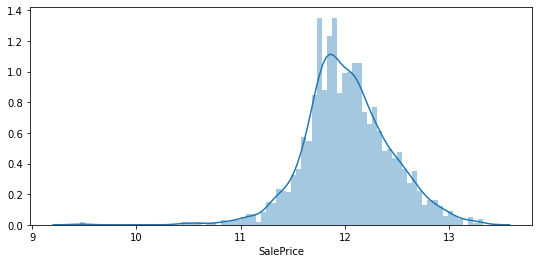

In [9]:
"""
Using log to normalise the target.
"""

train['SalePrice'] = np.log(train['SalePrice'])
plt.figure(figsize=(9,4))
sns.distplot(train['SalePrice'], bins=80)

In [10]:
# Dropping 'ID', 'PID' as they serve no purpose for correlation since they're just ID tags.

train.drop(['Id', 'PID'], axis=1, inplace=True)

In [11]:
test.drop(['Id', 'PID'], axis=1, inplace=True)

In [12]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
490,60,RL,NaN,9636,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1992,1993,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,808.0,808.0,GasA,Gd,Y,SBrkr,808,785,0,1593,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,1993.0,RFn,2.0,389.0,TA,TA,Y,342,40,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,12.089539
486,75,RM,35.0,6300,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,6,6,1914,2001,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,742.0,742.0,GasA,Ex,Y,SBrkr,742,742,0,1484,0.0,0.0,2,0,3,1,TA,9,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,291,134,0,0,0,NaN,NaN,NaN,0,6,2008,WD,11.759786
1214,20,RL,71.0,9178,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1468.0,1468.0,GasA,Ex,Y,SBrkr,1468,0,0,1468,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2008.0,RFn,3.0,904.0,TA,TA,Y,192,142,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,12.387977
936,60,RL,47.0,10820,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,342.0,Unf,0.0,646.0,988.0,GasA,Ex,Y,SBrkr,988,885,0,1873,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,597.0,TA,TA,Y,202,123,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,12.369466
1531,50,RL,55.0,7150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,4,4,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Rec,150.0,Unf,0.0,1040.0,1190.0,GasA,Gd,Y,SBrkr,1040,500,0,1540,1.0,0.0,1,0,4,1,Fa,7,Typ,0,NaN,Detchd,2002.0,Unf,1.0,352.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,11.652687


In [13]:
train.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,12.024397
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,0.411316
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,9.456341
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,11.773943
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.998433
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,13.323927


In [14]:
"""
There's an entry in the training data's 'Garage Yr Blt' that has the entry of 2207. The only figure that is flawed
is the '2' in index 1 of 2207. The only plausible entry would be 2007, so that will be replaced with 2007.
"""

train[train['Garage Yr Blt'] == 2207] 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,12.496127


In [15]:
train[train['Garage Yr Blt'] == 2207].columns.get_loc('Garage Yr Blt')

58

In [16]:
train.iloc[1699,58] = 2007

In [17]:
test.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,834.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1976.796163,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,25.695683,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [18]:
train.isna().sum().sort_values(ascending=False).head(27) # Checking for number of null values per column

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Bsmt Unf SF          1
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
Exterior 2nd         0
dtype: int64

In [19]:
test.isna().sum().sort_values(ascending=False).head(27) # Checking for number of null values per column

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
BsmtFin Type 2     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
Electrical          1
Mas Vnr Area        1
Mas Vnr Type        1
Year Built          0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
dtype: int64

In [20]:
"""
Fixing all features will null values on the training set
"""

train['Pool QC'].fillna('None', inplace=True) # None for houses assumed with no pool instead of dropping (null value)
train['Misc Feature'].fillna('None', inplace=True) # None for null values (no misc feature)
train['Alley'].fillna('None', inplace=True) # None for null values (no connection to alley assumed)
train['Fence'].fillna('None', inplace=True) # None for null values (no fence assumed)
train['Fireplace Qu'].fillna('None', inplace=True) # None for null values (no fireplace assumed)
train['Garage Cond'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
train['Garage Finish'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
train['Garage Type'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
train['Garage Qual'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
train['Garage Yr Blt'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
train['Garage Cars'].fillna(0, inplace=True) # 0 when related garage features are also null (assumed no garage)
train['Garage Area'].fillna(0, inplace=True) # 0 when related garage features are also null (assumed no garage)
train['Lot Frontage'].fillna(0, inplace=True) # None for null values, to be processed later on with median values
train['Bsmt Exposure'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['BsmtFin Type 2'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['BsmtFin Type 1'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['Bsmt Cond'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['Bsmt Qual'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['Bsmt Full Bath'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['Bsmt Half Bath'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['Total Bsmt SF'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['Bsmt Unf SF'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['BsmtFin SF 2'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['BsmtFin SF 1'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
train['Mas Vnr Type'].fillna('None', inplace=True) # None when masonry not related to masonry veneer area
train['Mas Vnr Area'].fillna(0, inplace=True) # 0 when masonry not present related to masonry type null 


In [21]:
"""
Doing the same process for the test set
"""

test['Pool QC'].fillna('None', inplace=True) # None for houses assumed with no pool instead of dropping (null value)
test['Misc Feature'].fillna('None', inplace=True) # None for null values (no misc feature)
test['Alley'].fillna('None', inplace=True) # None for null values (no connection to alley assumed)
test['Fence'].fillna('None', inplace=True) # None for null values (no fence assumed)
test['Fireplace Qu'].fillna('None', inplace=True) # None for null values (no fireplace assumed)
test['Garage Cond'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
test['Garage Finish'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
test['Garage Type'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
test['Garage Qual'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
test['Garage Yr Blt'].fillna('None', inplace=True) # None when related garage features are also null (assumed no garage)
test['Garage Cars'].fillna(0, inplace=True) # 0 when related garage features are also null (assumed no garage)
test['Garage Area'].fillna(0, inplace=True) # 0 when related garage features are also null (assumed no garage)
test['Lot Frontage'].fillna(0, inplace=True) # None for null values, to be processed later on with median values
test['Bsmt Exposure'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['BsmtFin Type 2'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['BsmtFin Type 1'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['Bsmt Cond'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['Bsmt Qual'].fillna('None', inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['Bsmt Full Bath'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['Bsmt Half Bath'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['Total Bsmt SF'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['Bsmt Unf SF'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['BsmtFin SF 2'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['BsmtFin SF 1'].fillna(0, inplace=True) # None when related bsmt features are also null (assumed bsmt not present)
test['Mas Vnr Type'].fillna('None', inplace=True) # None when masonry not related to masonry veneer area
test['Mas Vnr Area'].fillna(0, inplace=True) # 0 when masonry not present related to masonry type null 
test['Electrical'].fillna('SBrkr', inplace=True) # The most common entry is Sbrkr, so we'll replaced it with this.

In [22]:
train.isna().sum().sort_values(ascending=False).head(27) # Checking for number of null values per column

SalePrice         0
Foundation        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Year Remod/Add    0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Roof Style        0
Year Built        0
Heating           0
Utilities         0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
dtype: int64

In [23]:
test.isna().sum().sort_values(ascending=False).head(20)

Sale Type         0
Foundation        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Year Remod/Add    0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Roof Style        0
Year Built        0
dtype: int64

In [24]:
train_median = np.median(train['Lot Frontage']) # Replacing 0 values in Lot Frontage from previous step with median value.
train_median

train['Lot Frontage'] = train['Lot Frontage'].replace(0,train_median)

In [25]:
test_median = np.median(test['Lot Frontage']) # Replacing 0 values in Lot Frontage from previous step with median value.
test_median

test['Lot Frontage'] = test['Lot Frontage'].replace(0,train_median)

In [26]:
test['Bsmt Half Bath'] = test['Bsmt Half Bath'].astype(float) # Casting to float type for feature

In [27]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].astype(float) # Casting to float type for feature

In [28]:
# Setting up ordinal categories for label encoding and proceeding with encoding

lbe = LabelEncoder()
category = ('Lot Shape', 'Land Slope', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
            'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
            'Heating QC', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
            'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Overall Cond', 
            'Yr Sold', 'Mo Sold', 'Street', 'Alley', 'Central Air', 'MS SubClass')

for c in category:
    lbe.fit(list(train[c].values))
    train[c] = lbe.transform(list(train[c].values))

In [29]:
# Setting up ordinal categories for label encoding and proceeding with encoding

lbe = LabelEncoder()
category = ('Lot Shape', 'Land Slope', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
            'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
            'Heating QC', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
            'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Overall Cond', 
            'Yr Sold', 'Mo Sold', 'Street', 'Alley', 'Central Air', 'MS SubClass')

for c in category:
    lbe.fit(list(test[c].values))
    test[c] = lbe.transform(list(test[c].values))

In [30]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
490,5,RL,63.0,9636,1,1,0,Lvl,AllPub,Corner,0,Gilbert,Norm,Norm,1Fam,2Story,6,4,1992,1993,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,PConc,2,5,3,6,0.0,6,0.0,808.0,808.0,GasA,2,1,SBrkr,808,785,0,1593,0.0,0.0,2,1,3,1,3,7,7,1,5,BuiltIn,1993,2,2.0,389.0,5,5,2,342,40,0,0,0,0,3,2,None,0,11,3,WD,12.089539
486,7,RM,35.0,6300,1,0,3,Lvl,AllPub,Inside,0,OldTown,Norm,Norm,1Fam,2.5Unf,6,5,1914,2001,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,CBlock,5,5,3,6,0.0,6,0.0,742.0,742.0,GasA,0,1,SBrkr,742,742,0,1484,0.0,0.0,2,0,3,1,3,9,7,1,2,None,None,1,0.0,0.0,3,3,2,0,291,134,0,0,0,3,4,None,0,5,2,WD,11.759786
1214,0,RL,71.0,9178,1,1,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,1Story,8,4,2008,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,4,PConc,2,5,0,6,0.0,6,0.0,1468.0,1468.0,GasA,0,1,SBrkr,1468,0,0,1468,0.0,0.0,2,0,3,1,2,6,7,1,2,Attchd,2008,2,3.0,904.0,5,5,2,192,142,0,0,0,0,3,4,None,0,5,3,WD,12.387977
936,5,RL,47.0,10820,1,1,1,Lvl,AllPub,CulDSac,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,4,PConc,2,5,1,2,342.0,6,0.0,646.0,988.0,GasA,0,1,SBrkr,988,885,0,1873,0.0,0.0,2,1,3,1,2,7,7,1,5,Attchd,1999,2,2.0,597.0,5,5,2,202,123,0,0,0,0,3,4,None,0,2,1,WD,12.369466
1531,4,RL,55.0,7150,1,1,3,Lvl,AllPub,Inside,0,NAmes,Norm,Norm,1Fam,1.5Fin,4,3,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,PConc,5,5,3,5,150.0,6,0.0,1040.0,1190.0,GasA,2,1,SBrkr,1040,500,0,1540,1.0,0.0,1,0,4,1,1,7,7,0,3,Detchd,2002,3,1.0,352.0,5,5,2,0,0,0,0,0,0,3,4,None,0,7,1,WD,11.652687


In [31]:
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,14,RM,69.0,9142,1,0,3,Lvl,AllPub,Inside,0,OldTown,Norm,Norm,2fmCon,2Story,6,7,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,1,Stone,1,3,3,6,0,6,0,1020,1020,GasA,2,0,FuseP,908,1020,0,1928,0,0.0,2,0,4,2,1,9,5,0,3,Detchd,1910,3,1,440,3,4,2,0,60,112,0,0,0,1,4,None,0,3,0,WD
1,10,RL,63.0,9662,1,1,0,Lvl,AllPub,Inside,0,Sawyer,Norm,Norm,Duplex,1Story,5,3,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,4,CBlock,2,3,3,6,0,6,0,1967,1967,GasA,3,1,SBrkr,1967,0,0,1967,0,0.0,2,0,6,2,4,10,5,0,3,Attchd,1977,0,2,580,4,5,2,170,0,0,0,0,0,1,4,None,0,7,0,WD
2,5,RL,58.0,17104,1,1,0,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,7,4,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,4,PConc,2,1,0,2,554,6,0,100,654,GasA,0,1,SBrkr,664,832,0,1496,1,0.0,2,1,3,1,2,7,5,1,2,Attchd,2006,2,2,426,4,5,2,100,24,0,0,0,0,1,4,None,0,8,0,New
3,1,RM,60.0,8520,1,1,3,Lvl,AllPub,Inside,0,OldTown,Norm,Norm,1Fam,1Story,5,5,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,4,CBlock,5,3,3,6,0,6,0,968,968,GasA,3,1,SBrkr,968,0,0,968,0,0.0,1,0,2,1,4,5,5,0,3,Detchd,1935,3,2,480,0,5,0,0,0,184,0,0,0,1,4,None,0,6,1,WD
4,0,RL,63.0,9500,1,1,0,Lvl,AllPub,Inside,0,NAmes,Norm,Norm,1Fam,1Story,6,4,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,4,CBlock,2,3,3,1,609,6,0,785,1394,GasA,2,1,SBrkr,1394,0,0,1394,1,0.0,1,1,3,1,4,6,5,2,2,Attchd,1963,2,2,514,4,5,2,0,76,0,0,185,0,1,4,None,0,6,3,WD


In [32]:
# Checking for columns that are in training data that aren't in test data

invalid_cols = []

for i in train.columns:
    if i not in test.columns:
        invalid_cols.append(i)
        
invalid_cols

['SalePrice']

In [33]:
# Setting up nominal categories for label encoding

train = pd.get_dummies(train)

In [34]:
train.shape # Checking shape

(2051, 320)

In [35]:
test = pd.get_dummies(test)

In [36]:
test.shape

(879, 301)

In [37]:
# Checking for columns that are in training data that aren't in test data after one-hot encoding for nominal features

invalid_cols1 = []

for i in train.columns:
    if i not in test.columns:
        invalid_cols.append(i)

In [38]:
invalid_cols1 = invalid_cols[1::]

In [39]:
"""
The features here do not exist in the test data, and they make sense: Some neighbourhoods don't have houses sold 
within the test data, and with that, some conditions related to houses might not exist as well.

Garage year built features are due to different years existing between both sets.

These will be dropped.
"""

invalid_cols1

['SalePrice',
 'MS Zoning_A (agr)',
 'Utilities_NoSeWa',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Condition 2_Artery',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Roof Matl_ClyTile',
 'Roof Matl_Membran',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Heating_OthW',
 'Heating_Wall',
 'Electrical_Mix',
 'Garage Yr Blt_1895.0',
 'Garage Yr Blt_1896.0',
 'Garage Yr Blt_1914.0',
 'Garage Yr Blt_1919.0',
 'Garage Yr Blt_1929.0',
 'Garage Yr Blt_1933.0',
 'Garage Yr Blt_1936.0',
 'Garage Yr Blt_1942.0',
 'Garage Yr Blt_1945.0',
 'Garage Yr Blt_2207.0',
 'Misc Feature_Elev',
 'Misc Feature_TenC']

In [40]:
train = train.drop(invalid_cols1[1::], axis=1)

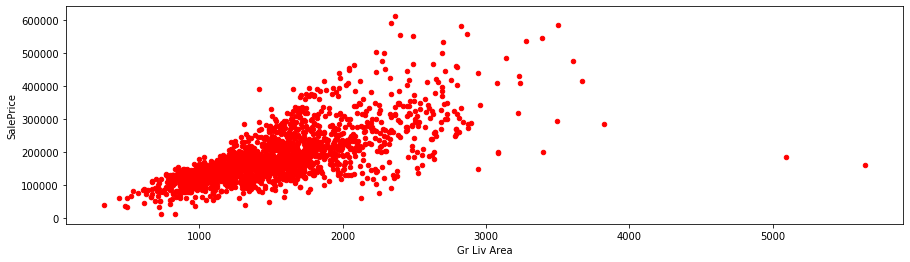

In [41]:
"""
The plot below shows that there lies somewhat of a linear relationship between the Gr Liv Area (essentially all 
living space area above ground), and the final sale price, indicating it being a strong predictor for our case.
"""

graphy = pd.DataFrame()
graphy['Gr Liv Area'] = train['Gr Liv Area']
graphy['SalePrice'] = np.exp(train['SalePrice'])

graphy.plot(kind='scatter', x= 'Gr Liv Area',y ='SalePrice', color='red', figsize=(15,4))

#### Proceeding with regression on all features just to see what a baseline score for prediction is like.
#### With so many features existing, it is highly unlikely a linear regression will perform well, we'll proceed with Lasso, Ridge, and ElasticNet instead.

In [42]:
saleprice = pd.DataFrame(train['SalePrice']) # Retaining saleprice column on its own

In [43]:
y = train['SalePrice'].values # y values for train_test_split purposes

In [44]:
train = train.drop('SalePrice', axis=1) # Dropping target out of predictor set
X = train

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34) # Setting up of train/test set splits

In [46]:
scaler = StandardScaler() # Standardising all predictors to control and maintain the variances

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Running Lasso regression with cross validation.

lasso_alphas = np.linspace(0.02, 1000)

optimal_lasso0 = LassoCV(alphas=lasso_alphas, cv=10, tol=0.01, max_iter=20000, random_state=34).fit(X_train, y_train)

print(optimal_lasso0.alpha_)
print(optimal_lasso0.score(X_train, y_train))

0.02
0.8529366695340102


In [48]:
# Running Ridge regression with cross validation.

ridge_alphas = np.logspace(-5, 10, 200)

optimal_ridge0 = RidgeCV(alphas=ridge_alphas, cv=10).fit(X_train, y_train)

print(optimal_ridge0.alpha_)
print(optimal_ridge0.score(X_train, y_train))

690.5513520162317
0.8990507065564306


In [49]:
"""
Running ElasticNet with cross validation with a range of values between 0 to 1, to find the optimal point
between L1 and L2 regularisation.
"""

optimal_elastic0 = ElasticNetCV(l1_ratio=[.1, .25, .5, .7, 0.75, .9, .95, .99, 1], n_alphas=500, max_iter=10000, cv=10, random_state=34).fit(X_train, y_train)

print(optimal_elastic0.alpha_)
print(optimal_elastic0.score(X_train, y_train))

0.06760560005544833
0.8893017790180969


### Round 1 Training Test Run (all features)

In [50]:
cross_ridge0_y = optimal_ridge0.predict(X_test)

In [51]:
ridge_pred0 = pd.DataFrame(cross_ridge0_y)
ridge_pred0.rename({0:'y_hat'}, axis=1, inplace=True)
ridge_pred0 = ridge_pred0.join(pd.DataFrame(y_test)).rename({0:'y'}, axis=1)

In [52]:
ridge0_rmse = sqrt(mean_squared_error(ridge_pred0['y'], ridge_pred0['y_hat']))
print(ridge0_rmse)
print(r2_score(ridge_pred0['y'], ridge_pred0['y_hat']))

0.1390804894579063
0.8948910272401882


In [53]:
lasso0_y = optimal_lasso0.predict(X_test)

In [54]:
lasso_pred0 = pd.DataFrame(lasso0_y)
lasso_pred0.rename({0:'y_hat'}, axis=1, inplace=True)
lasso_pred0 = lasso_pred0.join(pd.DataFrame(y_test)).rename({0:'y'}, axis=1)

In [55]:
lasso0_rmse = sqrt(mean_squared_error(lasso_pred0['y'], lasso_pred0['y_hat']))
print(lasso0_rmse)
print(r2_score(lasso_pred0['y'], lasso_pred0['y_hat']))

0.15793064391476364
0.8644685193046925


In [56]:
elastic0_y = optimal_elastic0.predict(X_test)

In [57]:
elastic_pred0 = pd.DataFrame(elastic0_y)
elastic_pred0.rename({0:'y_hat'}, axis=1, inplace=True)
elastic_pred0 = elastic_pred0.join(pd.DataFrame(y_test)).rename({0:'y'}, axis=1)

In [58]:
elastic0_rmse = sqrt(mean_squared_error(elastic_pred0['y'], elastic_pred0['y_hat']))
print(elastic0_rmse)
print(r2_score(elastic_pred0['y'], elastic_pred0['y_hat']))

0.13936267034834507
0.894464082641118


#### The initial run scores are pretty close between our training and test set, but it's yet to be optimised, which we will proceed to do so next.

#### Checking Lasso coefficients to see which features have been negated in the regression.

In [59]:
var_cols = train.columns

In [60]:
optimal_elastic0_coefs = pd.DataFrame({'variable':var_cols, 'coef':optimal_elastic0.coef_, 'abs_coef':np.abs(optimal_elastic0.coef_)})
optimal_elastic0_coefs.sort_values('abs_coef', inplace=True, ascending=False)
optimal_elastic0_coefs[optimal_elastic0_coefs['abs_coef'] == 0].sort_values('abs_coef', ascending=False)

,variable,coef,abs_coef
210,Garage Yr Blt_1941.0,-0.0,0.0
6,Land Slope,0.0,0.0
15,Bsmt Cond,0.0,0.0
19,BsmtFin Type 2,0.0,0.0
20,BsmtFin SF 2,0.0,0.0
21,Bsmt Unf SF,-0.0,0.0
26,2nd Flr SF,0.0,0.0
27,Low Qual Fin SF,-0.0,0.0
30,Bsmt Half Bath,-0.0,0.0
33,Bedroom AbvGr,0.0,0.0


In [61]:
drop_cols = optimal_elastic0_coefs[optimal_elastic0_coefs['abs_coef'] == 0]['variable']

In [62]:
train = train.drop(drop_cols, axis=1) # Dropping features from training set.

In [63]:
test = test.drop(drop_cols, axis=1) # Dropping features from test set.

In [64]:
train.shape

(2051, 75)

In [65]:
test.shape

(879, 86)

In [66]:
invalid2 = [i for i in test.columns if i not in train.columns] # Finding features not present in test set

In [67]:
invalid2

['Roof Matl_Metal',
 'Roof Matl_Roll',
 'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Mas Vnr Type_CBlock',
 'Heating_Floor',
 'Garage Yr Blt_1906.0',
 'Garage Yr Blt_1908.0',
 'Garage Yr Blt_1943.0',
 'Sale Type_VWD']

In [68]:
test = test.drop(invalid2, axis=1) # Dropping features not found in test set

In [69]:
train_float = train.select_dtypes(include=float)

In [70]:
train_float = train_float.join(saleprice)

In [71]:
train_float.head() # Trying to find any relations within areas (typically continuous) and sale price.

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Bsmt Full Bath,Garage Cars,Garage Area,SalePrice
490,0.0,0.0,808.0,0.0,2.0,389.0,12.089539
486,0.0,0.0,742.0,0.0,0.0,0.0,11.759786
1214,0.0,0.0,1468.0,0.0,3.0,904.0,12.387977
936,0.0,342.0,988.0,0.0,2.0,597.0,12.369466
1531,0.0,150.0,1190.0,1.0,1.0,352.0,11.652687


In [72]:
float_corr = train_float.corr() # Setting up correlation matrix

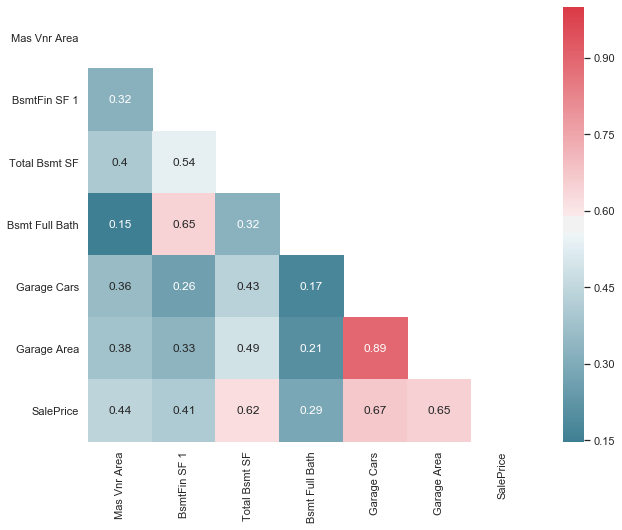

In [73]:
plt.figure(figsize=(10,8))

sns.set(style="white")
mask = np.zeros_like(float_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap1 = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(float_corr, annot=True, mask=mask, cmap=cmap1)

##### First off, checking features that are continuous - these tend to be area size related to various features of a house. 

##### Looks like there's collinearity between Garage Area and Garage Cars, we can drop Garage Cars as Garage Area would be a better approximate due to its continuous nature.

In [74]:
train = train.drop('Garage Cars', axis=1)
test = test.drop('Garage Cars', axis=1)

In [75]:
X = train
X_cols = train.columns

In [76]:
"""
Splitting up the training data into training and test sets for modelling.

"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

In [77]:
# Scaling sets for normalisation.

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_scaled = scaler.transform(test)

In [78]:
# Running ridge regression with cross validation on our modified data set.

model_ridge = RidgeCV(alphas=ridge_alphas, cv=10).fit(X_train, y_train)

print(model_ridge.alpha_)
print(model_ridge.score(X_train, y_train))

410.26581058271904
0.892315431544856


In [79]:
# Checking score for ridge regression on training test set. It's almost identical to our training set, meaning
# that this current model is a good predictable fit on our test set.

print(model_ridge.alpha_)
print(model_ridge.score(X_test, y_test))

410.26581058271904
0.8928640395045665


In [80]:
y_test_df = pd.DataFrame(np.exp(y_test))

In [81]:
ridge_df = pd.DataFrame(np.exp(model_ridge.predict(X_test)))
ridge_df = ridge_df.rename({0:'y_hat'}, axis=1)
ridge_pred = ridge_df.join(y_test_df)
ridge_pred = ridge_pred.rename({0:'y'}, axis=1)

In [82]:
ridge_pred_rmse = sqrt(mean_squared_error(ridge_pred['y'], ridge_pred['y_hat']))
print(ridge_pred_rmse)
print(r2_score(ridge_pred['y'], ridge_pred['y_hat']))

44464.463640523245
0.7373039183367482


In [83]:
# Running lasso regression with cross validation on our modified data set. At this point I'm more inclined to rely on
# either ridge or elastic as lasso can be too harsh to culling out features.

lasso_alphas = np.linspace(0.02, 1000)

model_lasso = LassoCV(alphas=lasso_alphas, cv=10, tol=0.01, max_iter=20000, random_state=34).fit(X_train, y_train)

print(model_lasso.alpha_)
print(model_lasso.score(X_train, y_train))

0.02
0.8514388788190386


In [84]:
print(model_lasso.alpha_)
print(model_lasso.score(X_test, y_test))

0.02
0.8642923503301263


In [85]:
lasso_coefs0 = pd.DataFrame({'variable0':X_cols, 'coef0':model_lasso.coef_, 'abs_coef0':np.abs(model_lasso.coef_)})
lasso_coefs0.sort_values('abs_coef0', inplace=True, ascending=False)
lasso_coefs0[lasso_coefs0['abs_coef0'] == 0].sort_values('coef0', ascending=False).head(10)

,variable0,coef0,abs_coef0
9,Exter Cond,0.0,0.0
36,MS Zoning_FV,0.0,0.0
48,Neighborhood_Somerst,0.0,0.0
8,Exter Qual,-0.0,0.0
7,Mas Vnr Area,0.0,0.0
30,Wood Deck SF,0.0,0.0
31,Open Porch SF,0.0,0.0
32,Screen Porch,0.0,0.0
33,Pool Area,-0.0,0.0
34,Yr Sold,-0.0,0.0


In [86]:
# Running elasticnet regression with cross validation on our modified data set.

model_elastic = ElasticNetCV(l1_ratio=[.1, .5, 0.75, .9, .95, .99, 1], n_alphas=500, max_iter=20000, cv=10, random_state=34).fit(X_train, y_train)

print(model_elastic.alpha_)
print(model_elastic.l1_ratio_)
print(model_elastic.score(X_train, y_train))

0.03478608209502519
0.1
0.8958042594988661


In [87]:
# Checking score for elasticnet CV regression on training test set with original alpha.
# Note that L1 ratio is at 0.1, which means it's running on a full L1 (Lasso) penalty mode.

print(model_elastic.alpha_)
print(model_elastic.l1_ratio_)
print(model_elastic.score(X_test, y_test))

0.03478608209502519
0.1
0.8972814432445025


In [88]:
# Creating dataframe to see the top and bottom coefficients.

elastic_coefs0 = pd.DataFrame({'variable0':X_cols, 'coef0':model_elastic.coef_, 'abs_coef0':np.abs(model_elastic.coef_)})
elastic_coefs0.sort_values('abs_coef0', inplace=True, ascending=False)
elastic_coefs0[elastic_coefs0['abs_coef0'] != 0].sort_values('coef0', ascending=False).head(10)

,variable0,coef0,abs_coef0
3,Overall Qual,0.103166,0.103166
17,Gr Liv Area,0.078641,0.078641
4,Overall Cond,0.036557,0.036557
5,Year Built,0.033885,0.033885
16,1st Flr SF,0.028219,0.028219
46,Neighborhood_NridgHt,0.022140,0.022140
18,Bsmt Full Bath,0.021843,0.021843
27,Garage Area,0.021104,0.021104
29,Paved Drive,0.020452,0.020452
19,Full Bath,0.020105,0.020105


In [89]:
# Noticeably, even at Lasso penalty mode, ElasticNet doesn't give us the same dropped features as the actual Lasso.

elastic_coefs0[elastic_coefs0['abs_coef0'] == 0].sort_values('coef0', ascending=False).head(10)

,variable0,coef0,abs_coef0
62,Heating_GasA,0.0,0.0
8,Exter Qual,-0.0,0.0


In [90]:
# Creating dataframe with actual sales price figures for RMSE and R2 score.

elastic_df = pd.DataFrame(np.exp(model_elastic.predict(X_test)))
elastic_df = elastic_df.rename({0:'y_hat'}, axis=1)
y_test_df = pd.DataFrame(np.exp(y_test))
elastic_pred = elastic_df.join(y_test_df)
elastic_pred = elastic_pred.rename({0:'y'}, axis=1)

In [91]:
# Score isn't great compared to the training set. It seems like we're overfitting. We'll check after this.

elastic_pred_rmse = sqrt(mean_squared_error(elastic_pred['y'], elastic_pred['y_hat']))
print(elastic_pred_rmse)
print(r2_score(elastic_pred['y'], elastic_pred['y_hat']))

44115.593160263525
0.7414100007004387


In [92]:
# Refitting the elasticnet model to our test set only to see what changes actually occur (will be compared later on).
# I'd actually like to compare all the results from the Lasso and 2 ElasticNet models. 

model_elastic.fit(X_test, y_test) 
print(model_elastic.alpha_)
print(model_elastic.l1_ratio_)
print(model_elastic.score(X_test, y_test))

0.04862843479123631
0.1
0.9162444261652727


In [93]:
# Creating the dataframe for calculations of RMSE and R2.

elastic_df = pd.DataFrame(np.exp(model_elastic.predict(X_test)))
elastic_df = elastic_df.rename({0:'y_hat'}, axis=1)
y_test_df = pd.DataFrame(np.exp(y_test))
elastic_pred = elastic_df.join(y_test_df)
elastic_pred = elastic_pred.rename({0:'y'}, axis=1)

In [94]:
elastic_pred_rmse = sqrt(mean_squared_error(elastic_pred['y'], elastic_pred['y_hat']))
print(elastic_pred_rmse)
print(r2_score(elastic_pred['y'], elastic_pred['y_hat']))

31245.4572063655
0.8702817004355221


In [95]:
"""
So this is where I'd like to diverge a little and find out what exactly is the first ElasticNet model doing with the
coefficients, since clearly it's running on L1 penalty, but it's not showing similarly zero-ed out features against
the actual Lasso model we ran.

I'll be comparing the two ElasticNet models' coefficients, finding out what's the difference between the zero-ed out
features, as well as comparing that difference to the Lasso model.

We already have the coefficent values done above with the first ElasticNet model, we'll proceed here with getting 
the second ElasticNet model coefficients.
"""

elastic_coefs1 = pd.DataFrame({'variable1':X_cols, 'coef1':model_elastic.coef_, 'abs_coef1':np.abs(model_elastic.coef_)})
elastic_coefs1.sort_values('abs_coef1', inplace=True, ascending=False)
elastic_coefs1[elastic_coefs1['abs_coef1'] != 0].sort_values('coef1', ascending=False).head(10)

,variable1,coef1,abs_coef1
3,Overall Qual,0.094210,0.094210
17,Gr Liv Area,0.070044,0.070044
5,Year Built,0.043797,0.043797
27,Garage Area,0.041312,0.041312
25,Fireplaces,0.036275,0.036275
18,Bsmt Full Bath,0.031538,0.031538
19,Full Bath,0.030510,0.030510
4,Overall Cond,0.028901,0.028901
15,Central Air,0.024309,0.024309
6,Year Remod/Add,0.021522,0.021522


In [96]:
elastic_coefs1[elastic_coefs1['abs_coef1'] == 0].sort_values('coef1', ascending=False).head(10)

,variable1,coef1,abs_coef1
50,Condition 1_Feedr,0.0,0.0
43,Neighborhood_IDOTRR,-0.0,0.0
21,Kitchen AbvGr,-0.0,0.0
20,Half Bath,-0.0,0.0
34,Yr Sold,-0.0,0.0
58,Exterior 1st_Stucco,0.0,0.0
59,Mas Vnr Type_BrkCmn,0.0,0.0
36,MS Zoning_FV,0.0,0.0
61,Foundation_Slab,-0.0,0.0
33,Pool Area,0.0,0.0


In [97]:
lasso_coefs0[lasso_coefs0['abs_coef0'] == 0].sort_values('coef0', ascending=False).head(10)

,variable0,coef0,abs_coef0
9,Exter Cond,0.0,0.0
36,MS Zoning_FV,0.0,0.0
48,Neighborhood_Somerst,0.0,0.0
8,Exter Qual,-0.0,0.0
7,Mas Vnr Area,0.0,0.0
30,Wood Deck SF,0.0,0.0
31,Open Porch SF,0.0,0.0
32,Screen Porch,0.0,0.0
33,Pool Area,-0.0,0.0
34,Yr Sold,-0.0,0.0


In [98]:
elastic_lasso = elastic_coefs1.join(lasso_coefs0)

In [99]:
elastic_lasso # 2nd ElasticNet coefs on the left, Lasso on the right

,variable1,coef1,abs_coef1,variable0,coef0,abs_coef0
3,Overall Qual,0.094210,0.094210,Overall Qual,0.141022,0.141022
17,Gr Liv Area,0.070044,0.070044,Gr Liv Area,0.103303,0.103303
5,Year Built,0.043797,0.043797,Year Built,0.036249,0.036249
27,Garage Area,0.041312,0.041312,Garage Area,0.025608,0.025608
25,Fireplaces,0.036275,0.036275,Fireplaces,0.015018,0.015018
18,Bsmt Full Bath,0.031538,0.031538,Bsmt Full Bath,0.008615,0.008615
19,Full Bath,0.030510,0.030510,Full Bath,0.000000,0.000000
4,Overall Cond,0.028901,0.028901,Overall Cond,0.015704,0.015704
15,Central Air,0.024309,0.024309,Central Air,0.014783,0.014783
6,Year Remod/Add,0.021522,0.021522,Year Remod/Add,0.028828,0.028828


In [100]:
elastic_score = elastic_coefs0.join(elastic_coefs1)

In [101]:
elastic_score['coef_diff'] = elastic_score['coef0'] - elastic_score['coef1']

In [102]:
elastic_score # 1st ElasticNet model on the left, second ElasticNet model on the right

,variable0,coef0,abs_coef0,variable1,coef1,abs_coef1,coef_diff
3,Overall Qual,0.103166,0.103166,Overall Qual,0.094210,0.094210,0.008955
17,Gr Liv Area,0.078641,0.078641,Gr Liv Area,0.070044,0.070044,0.008597
4,Overall Cond,0.036557,0.036557,Overall Cond,0.028901,0.028901,0.007655
5,Year Built,0.033885,0.033885,Year Built,0.043797,0.043797,-0.009912
16,1st Flr SF,0.028219,0.028219,1st Flr SF,0.004524,0.004524,0.023695
46,Neighborhood_NridgHt,0.022140,0.022140,Neighborhood_NridgHt,0.021413,0.021413,0.000727
18,Bsmt Full Bath,0.021843,0.021843,Bsmt Full Bath,0.031538,0.031538,-0.009695
27,Garage Area,0.021104,0.021104,Garage Area,0.041312,0.041312,-0.020207
29,Paved Drive,0.020452,0.020452,Paved Drive,0.006282,0.006282,0.014170
19,Full Bath,0.020105,0.020105,Full Bath,0.030510,0.030510,-0.010405


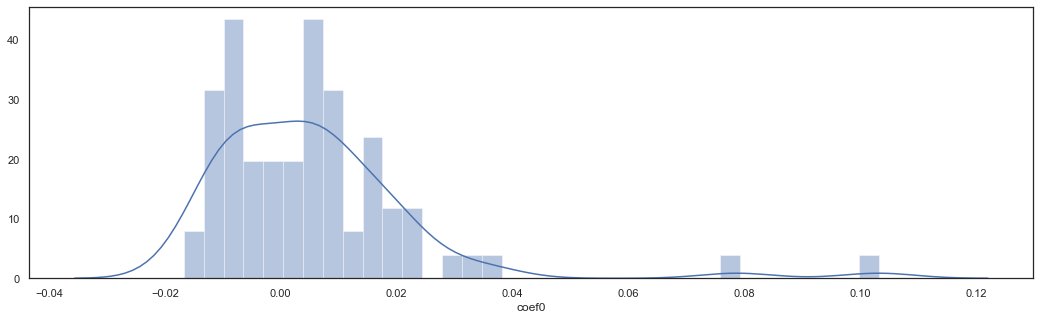

In [103]:
plt.figure(figsize=(18,5))
sns.distplot(elastic_score['coef0'], bins=35) # Distro of 1st ElasticNet's model coefs

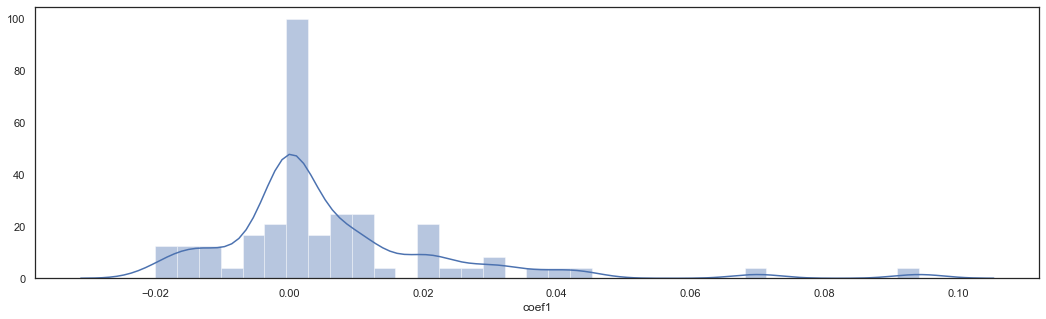

In [104]:
plt.figure(figsize=(18,5))
sns.distplot(elastic_score['coef1'], bins=35) # Distro of 2nd ElasticNet's model coefs

(-0.02, 0.03)

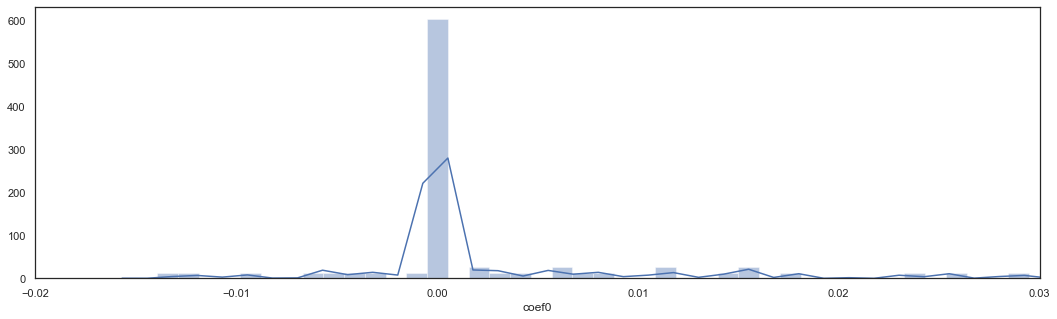

In [105]:
plt.figure(figsize=(18,5)) # Distro of Lasso model coefs
dist = sns.distplot(elastic_lasso['coef0'], bins=150) 
axes = dist.axes
axes.set_xlim(-0.02,0.03)

We now have all 3 different model's coefficients' distribution plotted out. We can sort of get an idea that the first ElasticNet model is overfitting, because:

- Lower alpha than the 2nd model
- Wider distribution of coefficients
- Dropped less features than the 2nd ElasticNet model and Lasso
- Scored far worse on test set than training set

On the other hand, the Lasso looks too sparse, as it has placed a bulk of the features at a very low (close to zero) coefficient, minimising a lot of features that might prove to be important in the next training round. 

Given that one model is overfitting and the other model is too sparse, I'm actually inclined to go with the 2nd elasticnet model. It looks like it has done a decent job of sparsing out features, but at the same time providing some L2 regularisation behind the scenes to soften the blow.

I'm not considering the Ridge model at this juncture as the first ElasticNet model has already shown that overfitting will occur without a stronger L1 penalty.

In [106]:
test_price = np.exp(model_elastic.predict(test_scaled)) # Predicting the actual test set with the 2nd ElasticNet model

In [107]:
tester = pd.read_csv('./datasets/test.csv')

In [108]:
solution = pd.DataFrame({'Id':tester['Id'], 'SalePrice':test_price}) # Forming up the csv file for 1st Kaggle submission.

In [109]:
solution.head() # Checking output of file.

,Id,SalePrice
0,2658,125132.266393
1,2718,153153.889325
2,2414,214837.512487
3,1989,108576.591443
4,625,174448.776697


In [111]:
solution.to_csv('./submission/ames_pred_elastic00.csv', index = False) # Saving to csv.

### Incorporating polynomial features for numerical features

In [112]:
poly = PolynomialFeatures(include_bias=False) # Setting up poly features for our training set

poly_poly = poly.fit_transform(train)
poly_cols = poly.get_feature_names(train.columns)
train_poly = pd.DataFrame(poly_poly)
train_poly.columns = poly_cols
train_poly.head()

,Lot Area,Street,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Finish,Garage Area,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Yr Sold,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RM,Land Contour_HLS,Lot Config_CulDSac,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition 1_Feedr,Condition 1_Norm,Bldg Type_1Fam,Bldg Type_Twnhs,Roof Matl_CompShg,Exterior 1st_AsbShng,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_Stucco,Mas Vnr Type_BrkCmn,Foundation_PConc,Foundation_Slab,Heating_GasA,Heating_Grav,Garage Type_Attchd,Garage Type_CarPort,Garage Yr Blt_1928.0,Garage Yr Blt_1952.0,Garage Yr Blt_1976.0,Garage Yr Blt_2006.0,Garage Yr Blt_2009.0,Sale Type_COD,Sale Type_Con,Sale Type_New,Lot Area^2,Lot Area Street,Lot Area Lot Shape,Lot Area Overall Qual,Lot Area Overall Cond,Lot Area Year Built,Lot Area Year Remod/Add,Lot Area Mas Vnr Area,Lot Area Exter Qual,Lot Area Exter Cond,Lot Area Bsmt Exposure,Lot Area BsmtFin Type 1,Lot Area BsmtFin SF 1,Lot Area Total Bsmt SF,Lot Area Heating QC,Lot Area Central Air,Lot Area 1st Flr SF,Lot Area Gr Liv Area,Lot Area Bsmt Full Bath,Lot Area Full Bath,Lot Area Half Bath,Lot Area Kitchen AbvGr,Lot Area Kitchen Qual,Lot Area TotRms AbvGrd,Lot Area Functional,Lot Area Fireplaces,Lot Area Garage Finish,Lot Area Garage Area,Lot Area Garage Cond,Lot Area Paved Drive,Lot Area Wood Deck SF,Lot Area Open Porch SF,Lot Area Screen Porch,Lot Area Pool Area,Lot Area Yr Sold,Lot Area MS Zoning_C (all),Lot Area MS Zoning_FV,Lot Area MS Zoning_RM,Lot Area Land Contour_HLS,Lot Area Lot Config_CulDSac,Lot Area Neighborhood_BrDale,Lot Area Neighborhood_Crawfor,Lot Area Neighborhood_Edwards,Lot Area Neighborhood_IDOTRR,Lot Area Neighborhood_MeadowV,Lot Area Neighborhood_NoRidge,Lot Area Neighborhood_NridgHt,Lot Area Neighborhood_OldTown,Lot Area Neighborhood_Somerst,Lot Area Neighborhood_StoneBr,Lot Area Condition 1_Feedr,Lot Area Condition 1_Norm,Lot Area Bldg Type_1Fam,Lot Area Bldg Type_Twnhs,Lot Area Roof Matl_CompShg,Lot Area Exterior 1st_AsbShng,Lot Area Exterior 1st_BrkComm,Lot Area Exterior 1st_BrkFace,Lot Area Exterior 1st_Stucco,Lot Area Mas Vnr Type_BrkCmn,Lot Area Foundation_PConc,Lot Area Foundation_Slab,Lot Area Heating_GasA,Lot Area Heating_Grav,Lot Area Garage Type_Attchd,Lot Area Garage Type_CarPort,Lot Area Garage Yr Blt_1928.0,Lot Area Garage Yr Blt_1952.0,Lot Area Garage Yr Blt_1976.0,Lot Area Garage Yr Blt_2006.0,Lot Area Garage Yr Blt_2009.0,Lot Area Sale Type_COD,Lot Area Sale Type_Con,Lot Area Sale Type_New,Street^2,Street Lot Shape,Street Overall Qual,Street Overall Cond,Street Year Built,Street Year Remod/Add,Street Mas Vnr Area,Street Exter Qual,Street Exter Cond,Street Bsmt Exposure,Street BsmtFin Type 1,Street BsmtFin SF 1,Street Total Bsmt SF,Street Heating QC,Street Central Air,Street 1st Flr SF,Street Gr Liv Area,Street Bsmt Full Bath,Street Full Bath,Street Half Bath,Street Kitchen AbvGr,Street Kitchen Qual,Street TotRms AbvGrd,Street Functional,Street Fireplaces,Street Garage Finish,Street Garage Area,Street Garage Cond,Street Paved Drive,Street Wood Deck SF,Street Open Porch SF,Street Screen Porch,Street Pool Area,Street Yr Sold,Street MS Zoning_C (all),Street MS Zoning_FV,Street MS Zoning_RM,Street Land Contour_HLS,Street Lot Config_CulDSac,Street Neighborhood_BrDale,Street Neighborhood_Crawfor,Street Neighborhood_Edwards,Street Neighborhood_IDOTRR,Street Neighborhood_MeadowV,Street Neighborhood_NoRidge,Street Neighborhood_NridgHt,Street Neighborhood_OldTown,Street Neighborhood_Somerst,Street Neighborhood_StoneBr,Street Condition 1_F

In [113]:
poly = PolynomialFeatures(include_bias=False) # Setting up poly features for our test set

poly_poly = poly.fit_transform(test)
poly_cols = poly.get_feature_names(test.columns)
test_poly = pd.DataFrame(poly_poly)
test_poly.columns = poly_cols
test_poly.head()

,Lot Area,Street,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Finish,Garage Area,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Yr Sold,MS Zoning_C (all),MS Zoning_FV,MS Zoning_RM,Land Contour_HLS,Lot Config_CulDSac,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Condition 1_Feedr,Condition 1_Norm,Bldg Type_1Fam,Bldg Type_Twnhs,Roof Matl_CompShg,Exterior 1st_AsbShng,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_Stucco,Mas Vnr Type_BrkCmn,Foundation_PConc,Foundation_Slab,Heating_GasA,Heating_Grav,Garage Type_Attchd,Garage Type_CarPort,Garage Yr Blt_1928.0,Garage Yr Blt_1952.0,Garage Yr Blt_1976.0,Garage Yr Blt_2006.0,Garage Yr Blt_2009.0,Sale Type_COD,Sale Type_Con,Sale Type_New,Lot Area^2,Lot Area Street,Lot Area Lot Shape,Lot Area Overall Qual,Lot Area Overall Cond,Lot Area Year Built,Lot Area Year Remod/Add,Lot Area Mas Vnr Area,Lot Area Exter Qual,Lot Area Exter Cond,Lot Area Bsmt Exposure,Lot Area BsmtFin Type 1,Lot Area BsmtFin SF 1,Lot Area Total Bsmt SF,Lot Area Heating QC,Lot Area Central Air,Lot Area 1st Flr SF,Lot Area Gr Liv Area,Lot Area Bsmt Full Bath,Lot Area Full Bath,Lot Area Half Bath,Lot Area Kitchen AbvGr,Lot Area Kitchen Qual,Lot Area TotRms AbvGrd,Lot Area Functional,Lot Area Fireplaces,Lot Area Garage Finish,Lot Area Garage Area,Lot Area Garage Cond,Lot Area Paved Drive,Lot Area Wood Deck SF,Lot Area Open Porch SF,Lot Area Screen Porch,Lot Area Pool Area,Lot Area Yr Sold,Lot Area MS Zoning_C (all),Lot Area MS Zoning_FV,Lot Area MS Zoning_RM,Lot Area Land Contour_HLS,Lot Area Lot Config_CulDSac,Lot Area Neighborhood_BrDale,Lot Area Neighborhood_Crawfor,Lot Area Neighborhood_Edwards,Lot Area Neighborhood_IDOTRR,Lot Area Neighborhood_MeadowV,Lot Area Neighborhood_NoRidge,Lot Area Neighborhood_NridgHt,Lot Area Neighborhood_OldTown,Lot Area Neighborhood_Somerst,Lot Area Neighborhood_StoneBr,Lot Area Condition 1_Feedr,Lot Area Condition 1_Norm,Lot Area Bldg Type_1Fam,Lot Area Bldg Type_Twnhs,Lot Area Roof Matl_CompShg,Lot Area Exterior 1st_AsbShng,Lot Area Exterior 1st_BrkComm,Lot Area Exterior 1st_BrkFace,Lot Area Exterior 1st_Stucco,Lot Area Mas Vnr Type_BrkCmn,Lot Area Foundation_PConc,Lot Area Foundation_Slab,Lot Area Heating_GasA,Lot Area Heating_Grav,Lot Area Garage Type_Attchd,Lot Area Garage Type_CarPort,Lot Area Garage Yr Blt_1928.0,Lot Area Garage Yr Blt_1952.0,Lot Area Garage Yr Blt_1976.0,Lot Area Garage Yr Blt_2006.0,Lot Area Garage Yr Blt_2009.0,Lot Area Sale Type_COD,Lot Area Sale Type_Con,Lot Area Sale Type_New,Street^2,Street Lot Shape,Street Overall Qual,Street Overall Cond,Street Year Built,Street Year Remod/Add,Street Mas Vnr Area,Street Exter Qual,Street Exter Cond,Street Bsmt Exposure,Street BsmtFin Type 1,Street BsmtFin SF 1,Street Total Bsmt SF,Street Heating QC,Street Central Air,Street 1st Flr SF,Street Gr Liv Area,Street Bsmt Full Bath,Street Full Bath,Street Half Bath,Street Kitchen AbvGr,Street Kitchen Qual,Street TotRms AbvGrd,Street Functional,Street Fireplaces,Street Garage Finish,Street Garage Area,Street Garage Cond,Street Paved Drive,Street Wood Deck SF,Street Open Porch SF,Street Screen Porch,Street Pool Area,Street Yr Sold,Street MS Zoning_C (all),Street MS Zoning_FV,Street MS Zoning_RM,Street Land Contour_HLS,Street Lot Config_CulDSac,Street Neighborhood_BrDale,Street Neighborhood_Crawfor,Street Neighborhood_Edwards,Street Neighborhood_IDOTRR,Street Neighborhood_MeadowV,Street Neighborhood_NoRidge,Street Neighborhood_NridgHt,Street Neighborhood_OldTown,Street Neighborhood_Somerst,Street Neighborhood_StoneBr,Street Condition 1_F

In [114]:
train_poly.shape

(2051, 2849)

In [115]:
test_poly.shape

(879, 2849)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(train_poly, y, test_size=0.3, random_state=34)

In [117]:
X_train = scaler.fit_transform(X_train) # Setting up our training sets for running the models below
X_test = scaler.transform(X_test)

In [118]:
"""
Running a Lasso model to identify features that can be dropped after poly features have been created.
"""

lasso_alphas = np.linspace(0.02, 1000)

poly_lasso0 = LassoCV(alphas=lasso_alphas, cv=10, tol=0.1, max_iter=10000).fit(X_train, y_train)

print(poly_lasso0.alpha_)
print(poly_lasso0.score(X_train, y_train))

0.02
0.9013479441015956


In [119]:
poly_lasso0.fit(X_test, y_test)
poly_lasso0.score(X_test, y_test)

0.9273447353287593

In [120]:
poly_lasso0_coefs = pd.DataFrame({'variable':poly_cols, 'coef':poly_lasso0.coef_, 'abs_coef':np.abs(poly_lasso0.coef_)})
poly_lasso0_coefs.sort_values('abs_coef', inplace=True, ascending=False)
poly_lasso0_coefs[poly_lasso0_coefs['abs_coef'] == 0].sort_values('abs_coef', ascending=False).head()

,variable,coef,abs_coef
1905,Open Porch SF Pool Area,-0.0,0.0
29,Paved Drive,0.0,0.0
11,BsmtFin Type 1,-0.0,0.0
19,Full Bath,0.0,0.0
20,Half Bath,0.0,0.0


In [121]:
poly_drop_cols = poly_lasso0_coefs[poly_lasso0_coefs['abs_coef'] == 0]['variable']

In [122]:
train_poly = train_poly.drop(poly_drop_cols, axis=1) # Dropping all features with coef of 0 via Lasso model.

In [123]:
test_poly = test_poly.drop(poly_drop_cols, axis=1) # Dropping all features with coef of 0 via Lasso model.

In [124]:
train_poly.shape

(2051, 64)

In [125]:
test_poly.shape

(879, 64)

In [126]:
poly_cols = train_poly.columns

### Model Training with Cross Validation Test (polynomial features)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(train_poly, y, test_size=0.3, random_state=34)

In [128]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_poly1 = scaler.transform(test_poly)

In [129]:
ridge_poly = RidgeCV(alphas=ridge_alphas, cv=10).fit(X_train, y_train)

print(ridge_poly.alpha_)
print(ridge_poly.score(X_train, y_train))

344.89622604057524
0.9004322288323396


In [130]:
# Ridge model is still overfitting.

print(ridge_poly.alpha_)
print(ridge_poly.score(X_test, y_test))

344.89622604057524
0.8379907147989405


In [131]:
lasso_poly = LassoCV(alphas=lasso_alphas, cv=10, tol=0.01, max_iter=20000, random_state=34).fit(X_train, y_train)

print(lasso_poly.alpha_)
print(lasso_poly.score(X_train, y_train))

0.02
0.8788849423045605


In [132]:
# Lasso model is overfitting as well.

print(lasso_poly.alpha_)
print(lasso_poly.score(X_test, y_test))

0.02
0.8885678874080002


In [133]:
elastic_poly = ElasticNetCV(l1_ratio=[.1, .5, .7, 0.75, .9, .95, .99, 1], n_alphas=500, max_iter=20000, cv=10, random_state=34).fit(X_train, y_train)

print(elastic_poly.alpha_)
print(elastic_poly.l1_ratio_)
print(elastic_poly.score(X_train, y_train))

0.041072374014781234
0.1
0.9037980305060325


In [134]:
print(elastic_poly.l1_ratio_)
print(elastic_poly.alpha_)
print(elastic_poly.score(X_test, y_test))

0.1
0.041072374014781234
0.8467876396322885


In [135]:
ridge_poly_df = pd.DataFrame(np.exp(ridge_poly.predict(X_test)))
ridge_poly_df = ridge_poly_df.rename({0:'y_hat'}, axis=1)
ridge_poly_pred = ridge_poly_df.join(y_test_df)
ridge_poly_pred = ridge_poly_pred.rename({0:'y'}, axis=1)
ridge_poly_pred_rmse = sqrt(mean_squared_error(ridge_poly_pred['y'], ridge_poly_pred['y_hat']))
print(ridge_poly_pred_rmse)
print(r2_score(ridge_poly_pred['y'], ridge_poly_pred['y_hat']))

24539.631444504783
0.919986447896117


In [136]:
poly_coefs = pd.DataFrame({'variable':poly_cols, 'coef':lasso_poly.coef_, 'abs_coef':np.abs(lasso_poly.coef_)})
poly_coefs.sort_values('abs_coef', inplace=True, ascending=False)
poly_coefs[poly_coefs['abs_coef'] != 0].sort_values('coef', ascending=False).head(10)

,variable,coef,abs_coef
0,Overall Qual,0.094479,0.094479
9,Gr Liv Area,0.066906,0.066906
1,Year Built,0.059980,0.059980
26,Overall Cond Gr Liv Area,0.046553,0.046553
5,Total Bsmt SF,0.028255,0.028255
17,Street Overall Qual,0.026166,0.026166
2,Year Remod/Add,0.024859,0.024859
13,Garage Area,0.023281,0.023281
42,Central Air Bldg Type_1Fam,0.022011,0.022011
4,BsmtFin SF 1,0.021784,0.021784


In [137]:
poly_drop_cols1 = poly_coefs[poly_coefs['abs_coef'] == 0]['variable']

In [138]:
train_poly = train_poly.drop(poly_drop_cols1, axis=1) # Dropping all features with coef of 0 via Lasso model.

In [139]:
test_poly = test_poly.drop(poly_drop_cols1, axis=1) # Dropping all features with coef of 0 via Lasso model.

In [140]:
train_poly.shape

(2051, 27)

In [141]:
test_poly.shape

(879, 27)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(train_poly, y, test_size=0.3, random_state=34)

In [143]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
lasso_poly = LassoCV(alphas=lasso_alphas, cv=10, max_iter=10000, random_state=34).fit(X_train, y_train)

print(lasso_poly.alpha_)
print(lasso_poly.score(X_train, y_train))

0.02
0.8788360320822498


In [145]:
# Lasso model is overfitting as well.

print(lasso_poly.alpha_)
print(lasso_poly.score(X_test, y_test))

0.02
0.8869600208304453


In [146]:
ridge_poly = RidgeCV(alphas=ridge_alphas, cv=10).fit(X_train, y_train)

print(ridge_poly.alpha_)
print(ridge_poly.score(X_train, y_train))

289.9422853882869
0.8957525466185018


In [147]:
# Ridge model has improved, but not as well as the ElasticNet model below.

print(ridge_poly.alpha_)
print(ridge_poly.score(X_test, y_test))

289.9422853882869
0.8918263976441495


In [148]:
ridge_poly_df = pd.DataFrame(np.exp(ridge_poly.predict(X_test)))
ridge_poly_df = ridge_poly_df.rename({0:'y_hat'}, axis=1)
ridge_poly_pred = ridge_poly_df.join(y_test_df)
ridge_poly_pred = ridge_poly_pred.rename({0:'y'}, axis=1)
ridge_poly_pred_rmse = sqrt(mean_squared_error(ridge_poly_pred['y'], ridge_poly_pred['y_hat']))
print(ridge_poly_pred_rmse)
print(r2_score(ridge_poly_pred['y'], ridge_poly_pred['y_hat']))

29107.584254695044
0.8874255573260345


In [149]:
elastic_poly = ElasticNetCV(l1_ratio=[.1, .5, .7, 0.75, .9, .95, .99, 1], n_alphas=500, max_iter=20000, cv=10, random_state=34).fit(X_train, y_train)

print(elastic_poly.alpha_)
print(elastic_poly.l1_ratio_)
print(elastic_poly.score(X_train, y_train))

0.058865716075057875
0.1
0.8968764497938979


In [150]:
print(elastic_poly.l1_ratio_)
print(elastic_poly.alpha_)
print(elastic_poly.score(X_test, y_test))

0.1
0.058865716075057875
0.8920682013291623


In [151]:
poly_coefs = pd.DataFrame({'variable':train_poly.columns, 'coef':elastic_poly.coef_, 'abs_coef':np.abs(elastic_poly.coef_)})
poly_coefs.sort_values('abs_coef', inplace=True, ascending=False)
poly_coefs[poly_coefs['abs_coef'] != 0].sort_values('coef', ascending=False)

,variable,coef,abs_coef
7,Gr Liv Area,0.064449,0.064449
1,Year Built,0.058239,0.058239
0,Overall Qual,0.054821,0.054821
18,Overall Cond Gr Liv Area,0.053820,0.053820
13,Street Overall Qual,0.043977,0.043977
4,Total Bsmt SF,0.029030,0.029030
2,Year Remod/Add,0.026376,0.026376
24,Central Air Bldg Type_1Fam,0.025657,0.025657
17,Overall Qual Paved Drive,0.024155,0.024155
10,Fireplaces,0.023528,0.023528


After running our ElasticNet model on the test sets, we can see that it gives us a deeper look into what the dataset is trying to tell us. Compared to its non-polynomial counterpart earlier on, we still see remnants of the patterns established earlier on, but with a more definitive interplay between the predictors.

We still see Overall Quality right at the top of the list, however Year Built has moved up to 2nd, with the combined predictors of Overall Condition and Living Area taking 3rd. The total basement area is now a more important predictor than before at 5th, and the combined predictor of type of street access along with the garage area  has now appeared as well.

In [152]:
final_test_poly = scaler.transform(test_poly)

In [153]:
poly_pred = np.exp(elastic_poly.predict(final_test_poly))

In [154]:
solution_poly = pd.DataFrame({'Id':tester['Id'], 'SalePrice':poly_pred})

In [155]:
solution_poly.head()

,Id,SalePrice
0,2658,149344.797947
1,2718,153176.625969
2,2414,204557.318740
3,1989,104468.629618
4,625,171522.071268


In [157]:
solution_poly.to_csv('./submission/ames_poly200.csv', index = False) # Saving file 

In [158]:
solution_combine = solution_poly.rename({'Id':'test_id', 'SalePrice':'pred_price'}, axis=1)

In [159]:
poly_coefs[poly_coefs['abs_coef'] != 0].sort_values('coef', ascending=False)

,variable,coef,abs_coef
7,Gr Liv Area,0.064449,0.064449
1,Year Built,0.058239,0.058239
0,Overall Qual,0.054821,0.054821
18,Overall Cond Gr Liv Area,0.053820,0.053820
13,Street Overall Qual,0.043977,0.043977
4,Total Bsmt SF,0.029030,0.029030
2,Year Remod/Add,0.026376,0.026376
24,Central Air Bldg Type_1Fam,0.025657,0.025657
17,Overall Qual Paved Drive,0.024155,0.024155
10,Fireplaces,0.023528,0.023528


In [160]:
train_review = pd.read_csv('./datasets/train.csv')
train_review.sort_values('Gr Liv Area', ascending=False).head(20) # Browsing sorted by largest living area

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1897,2738,905427030,75,RL,60.0,19800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2.5Unf,6,8,1935,1990,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,425.0,Unf,0.0,1411.0,1836.0,GasA,Gd,Y,SBrkr,1836,1836,0,3672,0.0,0.0,3,1,5,1,Gd,7,Typ,2,Gd,Detchd,1993.0,Unf,2.0,836.0,TA,TA,Y,684,80,32,0,0,0,NaN,NaN,NaN,0,12,2006,WD,415000
1035,2667,902400110,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0.0,0.0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3.0,840.0,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,475000
1692,2451,528360050,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.0,0.0,3,1,4,1,Ex,11,Typ,1,TA,Attchd,1993.0,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,NaN,NaN,NaN,0,5,2006,WD,584500
1939,1307,902207220,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1470.0,1470.0,GasA,Ex,Y,SBrkr,1675,1818,0,3493,0.0,0.0,3,0,3,1,Gd,10,Typ,1,Ex,Attchd,2003.0,Unf,3.0,870.0,TA,TA,Y,302,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,295000
858,2195,909176080,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256.0,Unf,0.0,1184.0,1440.0,GasA,Ex,Y,FuseA,1440,1440,515,3395,0.0,0.0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,200000
138,2331,527210040,60,RL,60.0,18062,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,662.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y

### Conclusions and Recommendations

After running through a few iterations of modelling and tweaking features before finally arriving at this final version, the main recurrent theme is exactly what the coefficients are saying: how large the house is the top factor in determining the sale price of a house. The next 3 factors, all with very close coefficients, are how old and how good the overall finish and condition of the house is (the latter of which can be mitigated by having renovations/remodelling done if initial quality isn't up to spec). The type of street access to the property is an important factor as well. Single family detached houses with central air conditioning and a fireplace are a specific type of house that brings good prices.

On the other end of things, houses in the Iowa DOT Rail Road and Edwards neighborhood fared worse, negating positive coefficients mentioned above.

A quick glance at the original data shows that the top 2 houses in terms of living space area are actually in Edwards, however due to their overall condition being only rated a 5, negated the sale price. The other 2 houses from Edwards are really old in their original construction date. This might indicate that perhaps the area is an old estate, currently going through a rejuvenation, which might be a good place for property punters to try their hand at with some money spent on them.

### Limitations

The dataset came filled with null values that were sometimes difficult to fully emulate an actual figure, for instance, lot frontage was filled with the median of available data. Certain features didn't mention how they're gauged on (eg overall quality, overall condition), with just a rating from 1 to 10 to utilise. If there were more granular data on how these overall features came about, it would be much more helpful. 

The requirements of this project was to solely use standard regression models without using advanced models, so there's a limit in terms of how much freedom we can utilise in approaching this analysis. 

### Future Work

It would be great to revisit this again using further modelling with different methods such as incorporating XGBoost with an ensemble method, taking the predictions from various models and getting the best out of each base estimator. Going by a different approach using Tensorflow and its Keras API might give a fresh take on the modelling aspect as well.

### Final Comments

The two final models (one without poly features, the other one with) gave an interesting look into how the model is actually faring in terms of being able to generalise well across the test data.

1st model: Non-poly, elasticnet model, it generated a score of 22814 (private board) and 27148 (public board) at Kaggle. 

2nd model: Poly, elasticnet model, it generated a score of 24711 (private board) and 23707 (public board) at Kaggle.

In terms of Kaggle's final standings (private board score), the non-poly, elasticnet model actually wins the poly elasticnet model. However, intuitively speaking, the poly model generalises better over the full test data set.

It has to be noted that there was a danger of chasing after a good public score whilst negating the private score, in the sense that I was overfitting the 30% of test results. The key in the end was to trust the model scores, and not let emotions get in the way.